(i)

In [29]:
import numpy as np
import networkx as nx
from scipy.linalg import expm
from scipy.sparse.linalg import eigs
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [47]:
def modelA(G,x=0,i0=0.1,beta=1.0,gamma=1.0,tf=5,Nt=1000):
    """
    Question 2.2
    Simulate model A

    Input:
    G: Networkx graph
    x: node which is initially infected with i_x=i0
    i0: magnitude of initial condition
    beta,gamma: model parameters
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)

    Output:
    iarray: N x Nt+1 Array containing i across network nodes at
                each time step.
    """

    N = G.number_of_nodes()
    iarray = np.zeros((N,Nt+1))
    tarray = np.linspace(0,tf,Nt+1)

    A = nx.adjacency_matrix(G).toarray()
    
    iarray[x,0] = i0
    
    y0 = iarray[:,0]

    def RHS(y,t):
        """Compute RHS of modelA at time t
        input: y should be a size N array
        output: dy, also a size N array corresponding to dy/dt

        Discussion: add discussion here
        """
        
        return [-beta*y[j] + gamma*(1-y[j])*np.dot(A[j,:],y) for j in range(N)]
        
    iarray = np.transpose(odeint(RHS,y0,tarray))
    
    return iarray

def modelB(G,x=0,i0=0.1,alpha=1.0,tf=5,Nt=1000):

    N = G.number_of_nodes()
    
    iarray = np.zeros((2*N,Nt+1))
    
    tarray = np.linspace(0,tf,Nt+1)

    A = nx.adjacency_matrix(G).toarray()
    
    Q = np.diag([G.degree(i) for i in range(G.number_of_nodes())])

    L = Q - A
    
    iarray[x,0] = i0
    
    y0 = iarray[:,0]

    def RHS(y,t):
        dy = np.zeros((2*N))
        dy[N:2*N] = y[0:N]
        for j in range(0,N):
            dy[j] = alpha*(np.dot(L[j,:],y[N:2*N]))
        
        return dy
        
    iarray = np.transpose(odeint(RHS,y0,tarray))
    
    return iarray

def lineardiff(G,x=0,i0=0.1,tf=5,Nt=1000):

    N = G.number_of_nodes()
    
    iarray = np.zeros((N,Nt+1))
    
    tarray = np.linspace(0,tf,Nt+1)

    A = nx.adjacency_matrix(G).toarray()
    
    Q = np.diag([G.degree(i) for i in range(G.number_of_nodes())])

    L = Q - A
    
    iarray[x,0] = i0
    
    y0 = iarray[:,0]
    
    e,v = np.linalg.eig(L)
    
    L_sol = np.diag(e)
    
    for j in range(1,Nt+1):
        iarray[:,j] = np.dot(expm(tarray[j]*L_sol),y0)
        
    return iarray

In [51]:
a = lineardiff(ba2,x=0,i0=100)

In [52]:
a

array([[1.00000000e+02, 1.20496112e+02, 1.45193130e+02, ...,
        6.47274070e+82, 7.79940089e+82, 9.39797484e+82],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
def transport(input=(None)):
    """Analyze transport processes (model A, model B, linear diffusion)
    on Barabasi-Albert graphs.
    Modify input and output as needed.
    """

    return None #modify as needed

In [3]:
ba1 = nx.barabasi_albert_graph(n = 2000, m = 4, seed= 10)

In [6]:
mod = modelA(ba1)

In [7]:
mod.shape

(2000, 1001)

(ii)

alpha = -0.01, beta = 0.5, gamma = 0.1 

In [4]:
ba2 = nx.barabasi_albert_graph(n = 100, m = 5, seed= 10)

In [21]:
sorted(ba2.degree, key=lambda x: x[1], reverse=True)[0]

(6, 36)

In [67]:
modelA(ba1,beta = 0.5, gamma = 0.1,).shape

def transport(input=(None)):
    """Analyze transport processes (model A, model B, linear diffusion)
    on Barabasi-Albert graphs.
    Modify input and output as needed.
    """
    ba2 = nx.barabasi_albert_graph(n=100, m=5, seed=10)

    A = modelA(ba2,beta = 0.5, gamma = 0.1,x=6)
    ax.plot(A[:,-1])
    B = modelB(ba2,alpha = -0.01,x=6)[0:100,:]
    ax.plot(B[:,-1])
#L = lineardiff(ba2,x=6)
#plt.plot(L[:,-1])
    ax.xlabel('position')
    ax.ylabel('Walker number')
    ax.title('Distribution of Walks Across BA(100,5)')
    ax.legend(['ModelA','ModelB'])
    
    A = modelA(ba2,beta = 0.5, gamma = 0.1,x=50)
    plt.plot(A[:,-1])
    B = modelB(ba2,alpha = -0.01,x=50)[0:100,:]
    plt.plot(B[:,-1])
    plt.xlabel('position')
    plt.ylabel('Walker number')
    plt.title('Perturbed Distribution of Walks Across BA(100,5)')
    plt.legend(['ModelA','ModelB'])

    return ax

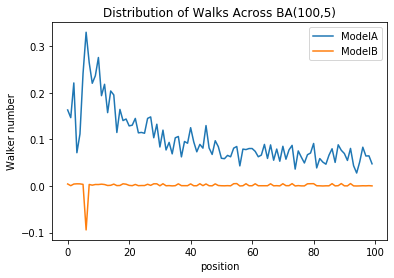

In [61]:
A = modelA(ba2,beta = 0.5, gamma = 0.1,x=6)
plt.plot(A[:,-1])
B = modelB(ba2,alpha = -0.01,x=6)[0:100,:]
plt.plot(B[:,-1])
#L = lineardiff(ba2,x=6)
#plt.plot(L[:,-1])
plt.xlabel('position')
plt.ylabel('Walker number')
plt.title('Distribution of Walks Across BA(100,5)')
plt.legend(['ModelA','ModelB'])

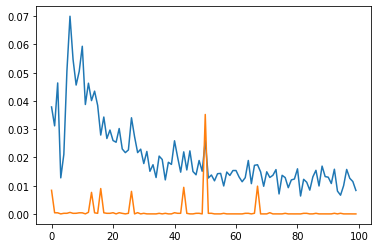

In [36]:
A = modelA(ba2,beta = 0.5, gamma = 0.1,x=50)
plt.plot(A[:,-1])
B = modelB(ba2,alpha = -0.01,x=50)[0:100,:]
plt.plot(B[:,-1])

In [18]:
B[0:100,:].shape

(100, 1001)

Text(0, 0.5, 'number of walkers')

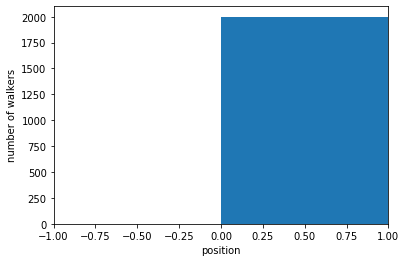

In [10]:

X = modelA(ba1,beta = 0.5, gamma = 0.1)
Xmax = np.max(np.abs(X[:,-1]))
plt.hist(X[:,-1],bins = int(Xmax)) #divide by M to get fraction
plt.xlim(-Xmax,Xmax)
plt.xlabel('position')
plt.ylabel('number of walkers')

In [6]:
modelB(ba2,alpha = -0.01)

array([[ 1.00000000e-01,  9.99998375e-02,  9.99993500e-02, ...,
        -2.02410570e-02, -2.04086805e-02, -2.05762151e-02],
       [ 0.00000000e+00,  4.65621267e-15,  2.99364261e-14, ...,
         7.23332738e-04,  7.25697709e-04,  7.28066869e-04],
       [ 0.00000000e+00,  5.82026583e-15,  3.74205320e-14, ...,
         9.00942640e-04,  9.03882858e-04,  9.06828258e-04],
       ...,
       [ 0.00000000e+00,  1.42082290e-21,  1.29464784e-17, ...,
         2.17075827e-04,  2.18090324e-04,  2.19108388e-04],
       [ 0.00000000e+00,  1.42082290e-21,  1.29464784e-17, ...,
         2.20767645e-04,  2.21806480e-04,  2.22849016e-04],
       [ 0.00000000e+00,  5.29246082e-35,  3.21447786e-27, ...,
         1.32322961e-05,  1.33215236e-05,  1.34112547e-05]])